In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("city combine Toronto.csv")
#df_mrt = pd.read_csv("city combine Montreal.csv")
df.head()


,Unnamed: 0,review_id,u_id,business_id,rev_stars,date,bus_id,name,city,state,...,is_open,attributes,categories,hours,user_id,name.1,UserReview_count,yelping_since,friends,average_stars
0,0,Rc--KMb2vv0z5zUyEwLS3A,0LUt7xSvYgLpL0zBezI5QA,nvbfWYxTNq5XgJkcAPcXNQ,5.0,2015-10-24 14:04:14,nvbfWYxTNq5XgJkcAPcXNQ,Thai One On,North York,ON,...,0,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Thai","Row(Friday='10:0-22:0', Monday='10:0-22:0', Sa...",0LUt7xSvYgLpL0zBezI5QA,Jovel,17,2015-05-17 22:45:50,"vRIy03B-RojFB-pwpWECVw, VUPQF1XuNBv1gfCv7lyv7Q...",4.00
1,1,ukVjELEdLdtI7bDnkhTCWQ,0LUt7xSvYgLpL0zBezI5QA,snw9iNNLpFYZeHotW00uVA,5.0,2015-10-24 12:29:24,snw9iNNLpFYZeHotW00uVA,Lee Restaurant,Toronto,ON,...,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Asian Fusion","Row(Friday='17:0-23:30', Monday='0:0-0:0', Sat...",0LUt7xSvYgLpL0zBezI5QA,Jovel,17,2015-05-17 22:45:50,"vRIy03B-RojFB-pwpWECVw, VUPQF1XuNBv1gfCv7lyv7Q...",4.00
2,2,cMN9eDHkH7SCsYsW14ubew,31nz8urmYS2uogLPWZnx7Q,41o1FUbCYKJv2djtnlkzlg,4.0,2016-10-28 00:40:36,41o1FUbCYKJv2djtnlkzlg,Bar Raval,Toronto,ON,...,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Nightlife, Spanish, Bars, Tapas B...","Row(Friday='11:0-2:0', Monday='11:0-2:0', Satu...",31nz8urmYS2uogLPWZnx7Q,Nhi,112,2013-09-27 00:29:03,"jq4k1GUc4DV_te_i1pOzQA, r6_B9482C89MQhKvthrtAA...",3.88
3,3,Sa34RHfNOKpz-vf1OuOBnQ,47NAV-86kgFEuIWT3Y9o-A,EK38MXW_OsC5CZVvIZodIw,4.0,2016-08-22 01:15:05,EK38MXW_OsC5CZVvIZodIw,Fugo Desserts,Toronto,ON,...,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Waffles, Food, Ice Cream & Frozen...","Row(Friday='12:0-22:0', Monday='12:0-21:0', Sa...",47NAV-86kgFEuIWT3Y9o-A,Serina,1,2016-08-22 01:05:41,"NZ2trqLpx_E01DGlNzk6Bw, 6RUSbHGH0RlNVnrNmXuTbg...",4.00
4,4,nLIa4T0mbuqlztKHtZVRHg,6J0mGxAaPuHAPj8ShjOCag,OIdOJaNS8M624F58XGV3PQ,3.0,2016-04-23 01:18:12,OIdOJaNS8M624F58XGV3PQ,Pizzeria Libretto Danforth,Toronto,ON,...,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Italian, Pizza","Row(Friday='11:30-23:0', Monday='11:30-22:0', ...",6J0mGxAaPuHAPj8ShjOCag,Melissa,58,2011-04-02 01:22:38,"FRe2ylKTM2DajzvaUp0nQg, PP_DKB0H31-Rx3R6aqthUQ...",3.17


In [3]:
df_mrt.head()

NameError: name 'df_mrt' is not defined

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45047 entries, 0 to 45046
Data columns (total 22 columns):
Unnamed: 0          45047 non-null int64
review_id           45047 non-null object
u_id                45047 non-null object
business_id         45047 non-null object
rev_stars           45047 non-null float64
date                45047 non-null object
bus_id              45047 non-null object
name                45047 non-null object
city                45047 non-null object
state               45047 non-null object
bus_stars           45047 non-null float64
ResReview_count     45047 non-null int64
is_open             45047 non-null int64
attributes          44795 non-null object
categories          45047 non-null object
hours               40411 non-null object
user_id             45047 non-null object
name.1              45047 non-null object
UserReview_count    45047 non-null int64
yelping_since       45047 non-null object
friends             45047 non-null object
average_sta

In [4]:
df.describe()

,Unnamed: 0,rev_stars,bus_stars,ResReview_count,is_open,UserReview_count,average_stars
count,45047.000000,45047.000000,45047.000000,45047.000000,45047.000000,45047.000000,45047.000000
mean,22523.000000,3.575133,3.551080,144.929829,0.802162,228.025573,3.615550
std,13004.093125,1.160914,0.543729,145.887460,0.398374,600.038936,0.473218
min,0.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000
25%,11261.500000,3.000000,3.000000,43.000000,1.000000,33.000000,3.390000
50%,22523.000000,4.000000,3.500000,95.000000,1.000000,89.000000,3.640000
75%,33784.500000,4.000000,4.000000,191.000000,1.000000,212.000000,3.880000
max,45046.000000,5.000000,5.000000,700.000000,1.000000,7750.000000,5.000000


## Here change the labels: replace the current ones with the high-level label and drop duplicate labels, then use get_dummies 

In [5]:
df = df[(df.state == 'ON' )|(df.state == 'BC' ) ]
df.info()
df_categories1 = df['categories'].str.split(', ', expand=True)
df_categories1.head()
df_categories1.info()
#df_categories = pd.get_dummies(df_categories1)
#df_categories1.info()
#df_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45047 entries, 0 to 45046
Data columns (total 22 columns):
Unnamed: 0          45047 non-null int64
review_id           45047 non-null object
u_id                45047 non-null object
business_id         45047 non-null object
rev_stars           45047 non-null float64
date                45047 non-null object
bus_id              45047 non-null object
name                45047 non-null object
city                45047 non-null object
state               45047 non-null object
bus_stars           45047 non-null float64
ResReview_count     45047 non-null int64
is_open             45047 non-null int64
attributes          44795 non-null object
categories          45047 non-null object
hours               40411 non-null object
user_id             45047 non-null object
name.1              45047 non-null object
UserReview_count    45047 non-null int64
yelping_since       45047 non-null object
friends             45047 non-null object
average_sta

In [6]:
#df_categories1.head()
Categories = np.array(['Fast Food', 'Seafood', 'Cafes', 'Diners', 'Delivery', 'Bars', 'Special Settings', 
                       'Bakeries', 'East Asian', 'South Eastern Asian', 'South Asia', 'Other Asian', 'European', 
                       'Mediterranean', 'North America', 'African', 'Latin American', 'Night'])
print(Categories[0])
df_categories1.info()
df_categories1.head()

Fast Food
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45047 entries, 0 to 45046
Data columns (total 14 columns):
0     45047 non-null object
1     44981 non-null object
2     27919 non-null object
3     17579 non-null object
4     11308 non-null object
5     6486 non-null object
6     3838 non-null object
7     2188 non-null object
8     698 non-null object
9     389 non-null object
10    386 non-null object
11    183 non-null object
12    99 non-null object
13    38 non-null object
dtypes: object(14)
memory usage: 5.2+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Restaurants,Thai,None,None,None,None,None,None,None,None,None,None,None,None
1,Restaurants,Asian Fusion,None,None,None,None,None,None,None,None,None,None,None,None
2,Restaurants,Nightlife,Spanish,Bars,Tapas Bars,Cocktail Bars,Tapas/Small Plates,None,None,None,None,None,None,None
3,Restaurants,Waffles,Food,Ice Cream & Frozen Yogurt,Desserts,Donuts,None,None,None,None,None,None,None,None
4,Restaurants,Italian,Pizza,None,None,None,None,None,None,None,None,None,None,None


In [7]:
df_cateReplaced = df_categories1.replace({'Pizza':Categories[0], 'Sandwiches':Categories[0], 'Hot Dogs':Categories[0], 'Wraps':Categories[0], 'Burgers':Categories[0],
                                          'Seafood Markets':Categories[1],
                                          'Internet Cafes':Categories[2], 'Coffee & Tea':Categories[2], 'Tea Rooms':Categories[2], 'Coffee Roasteries':Categories[2], 'Creperies':Categories[2], 'Ice Cream & Frozen Yogurt':Categories[2], 'Juice Bars & Smoothies':Categories[2], 'Custom Cakes':Categories[2], 'Patisserie/Cake Shop':Categories[2], 
                                          'Delis':Categories[3], 'Food Stands':Categories[3], 'Food Court':Categories[3], 'Street Vendors':Categories[3], 'Food Trucks':Categories[3], 
                                          'Food Delivery Services':Categories[4], 'Home Services':Categories[4], 
                                          'Gastropubs':Categories[5], 'Lounges':Categories[5],'Bistros':Categories[5],
                                          'Wine Bars':Categories[5], 'Pubs':Categories[5],'Cocktail Bars':Categories[5],'Chicken Wings':Categories[5],'Sandwiches':Categories[5],
                                          'Beer Bar':Categories[5],'Sports Bars':Categories[5],'Beer':Categories[5],
                                          'Fish & Chips':Categories[5],'Breweries':Categories[5],'Wine & Spirits':Categories[5],'Jazz & Blues':Categories[5],'Dive Bars':Categories[5],'Brasseries':Categories[5],'Tiki Bars':Categories[5],'Hookah Bars':Categories[5],'Wineries':Categories[5],'Speakeasies':Categories[5],
                                          'Delicatessen':Categories[6],'Music Venues':Categories[6],'Local Flavor':Categories[6],'Piano Bars':Categories[6],'Tabletop Games':Categories[6],'Farmers Market':Categories[6],'Art Galleries':Categories[6],'Comedy Clubs':Categories[6],
                                          'Waffles':Categories[7],'Donuts':Categories[7],'Bagels':Categories[7],
                                          'Chinese':Categories[8],'Korean':Categories[8],'Japanese':Categories[8],'Taiwanese':Categories[8],'Hong Kong Style Cafe':Categories[8],'Hakka':Categories[8],'Cantonese':Categories[8],'Szechuan':Categories[8],'Noodles':Categories[8],'Dim Sum':Categories[8],'Hot Pot':Categories[8],'Bubble Tea':Categories[8],'Sushi Bars':Categories[8],'Ramen':Categories[8],'Poke':Categories[8], 
                                          'Thai':Categories[9],'Vietnamese':Categories[9],'Indonesian':Categories[9],'Singaporean':Categories[9],'Cambodian':Categories[9],'Laotian':Categories[9],'Malaysian':Categories[9],'Filipino':Categories[9],
                                          'Indian':Categories[10],'Bangladeshi':Categories[10], 'Sri Lankan':Categories[10],
                                          'Asian Fusion':Categories[11], 'Pan Asian':Categories[11], 'Himalayan/Nepalese':Categories[11],
                                          'Italian':Categories[12],'Polish':Categories[12],'Portuguese':Categories[12],'French':Categories[12],'Spanish':Categories[12],'Irish':Categories[12],'British':Categories[12],'Hungarian':Categories[12],'Russian':Categories[12],'German':Categories[12],'Austrian':Categories[12],'Turkish':Categories[12],'Tapas Bars':Categories[12],'Irish Pub':Categories[12],'Basque':Categories[12],'Tapas/Small Plates':Categories[12],'Fondue':Categories[12],
                                          'Middle Eastern':Categories[13],'Arabian':Categories[13],'Middle Eastern':Categories[13],'Persian/Iranian':Categories[13],'Afghan':Categories[13],'Pakistani':Categories[13],'Greek':Categories[13],'Lebanese':Categories[13],'Syrian':Categories[13],'Kebab':Categories[13],
                                          'Mexican':Categories[14],'American (Traditional)':Categories[14],'American (New)':Categories[14],'Canadian (New)':Categories[14],'Tex-Mex':Categories[14],'Southern':Categories[14],'Cajun/Creole':Categories[14],'Hawaiian':Categories[14],'Soul Food':Categories[14],'Cheesesteaks':Categories[14],
                                          'Ethiopian':Categories[15],'Moroccan':Categories[15],'Egyptian':Categories[15],'Falafel':Categories[15],
                                          'Peruvian':Categories[16],'Caribbean':Categories[16],'Cuban':Categories[16],'Brazilian':Categories[16],'Colombian':Categories[16],'Salvadoran':Categories[16],'Argentine':Categories[16],'Haitian':Categories[16],'Empanadas':Categories[16],
                                          'Event Planning & Services':Categories[17],'Nightlife':Categories[17],
                                          'Delete':None,'Food':None,'Women\'s Clothing':None,'Ethnic Food':None,'Caterers':None,'Comfort Food':None,'Toy Stores':None,'Chicken Shop':None,'Shopping':None,'International':None,'Salad':None,'Health Markets':None,'Grocery':None,'Hotels & Travel':None,'Imported Food':None,'Arts & Entertainment':None,'Dance Clubs':None,'Soup':None,'Specialty Food':None,'Venues & Event Spaces':None,'Local Services':None,'Fruits & Veggies':None,'Butcher':None,'Karaoke':None,'Fashion':None,'Party & Event Planning':None,'Public Markets':None,'Convenience Stores':None,'Cheese Shops':None,'Vinyl Records':None,'Candy Stores':None,'Beauty & Spas':None,'Arts & Crafts':None,'Books':None,'Hotels':None,'Hobby Shops':None,'Meat Shops':None,'Chocolatiers & Shops':None,'Music & Video':None,'Real Estate':None,'Coffee & Tea Supplies':None,'Organic Stores':None,'Shared Office Spaces':None,'Wigs':None,'Mags':None,'Automotive':None
                                         }
                                        )
#df_cateReplaced = df_categories1.replace('Pizza', 'FastFood')
                                          
df_cateReplaced.head()                                                                    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Restaurants,South Eastern Asian,None,None,None,None,None,None,None,None,None,None,None,None
1,Restaurants,Other Asian,None,None,None,None,None,None,None,None,None,None,None,None
2,Restaurants,Night,European,Bars,European,Bars,European,None,None,None,None,None,None,None
3,Restaurants,Bakeries,None,Cafes,Desserts,Bakeries,None,None,None,None,None,None,None,None
4,Restaurants,European,Fast Food,None,None,None,None,None,None,None,None,None,None,None


In [8]:
#df_col1=pd.get_dummies(df_cateReplaced.loc[:,0:1])
#df_col2=pd.get_dummies(df_cateReplaced.loc[:,[0,2]])
#df_col3=pd.get_dummies(df_cateReplaced.loc[:,[0,3]])
#df_col4=pd.get_dummies(df_cateReplaced.loc[:,[0,4]])
#df_col5=pd.get_dummies(df_cateReplaced.loc[:,[0,5]])
#df_col6=pd.get_dummies(df_cateReplaced.loc[:,[0,6]])
#df_col7=pd.get_dummies(df_cateReplaced.loc[:,[0,7]])
#df_col8=pd.get_dummies(df_cateReplaced.loc[:,[0,8]])
#df_col9=pd.get_dummies(df_cateReplaced.loc[:,[0,9]])
#df_col10=pd.get_dummies(df_cateReplaced.loc[:,[0,10]])
#df_col11=pd.get_dummies(df_cateReplaced.loc[:,[0,11]])
#df_col12=pd.get_dummies(df_cateReplaced.loc[:,[0,12]])
#df_col13=pd.get_dummies(df_cateReplaced.loc[:,[0,13]])
#df_col11.head()

In [9]:
df_categories = pd.get_dummies(df_cateReplaced)
df_categories.info()
#list(df_categories)
df_categories.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45047 entries, 0 to 45046
Columns: 177 entries, 0_Restaurants to 11_Latin American
dtypes: uint8(177)
memory usage: 7.9 MB


,0_Restaurants,1_African,1_Bakeries,1_Barbeque,1_Bars,1_Breakfast & Brunch,1_Buffets,1_Cafes,1_Delivery,1_Desserts,...,9_Night,10_Bars,10_Breakfast & Brunch,10_Cafes,10_Desserts,10_North America,11_Bakeries,11_Bars,11_Cafes,11_Latin American
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_final = pd.concat([df, df_categories], axis=1, sort=False)
df_final.head()

,Unnamed: 0,review_id,u_id,business_id,rev_stars,date,bus_id,name,city,state,...,9_Night,10_Bars,10_Breakfast & Brunch,10_Cafes,10_Desserts,10_North America,11_Bakeries,11_Bars,11_Cafes,11_Latin American
0,0,Rc--KMb2vv0z5zUyEwLS3A,0LUt7xSvYgLpL0zBezI5QA,nvbfWYxTNq5XgJkcAPcXNQ,5.0,2015-10-24 14:04:14,nvbfWYxTNq5XgJkcAPcXNQ,Thai One On,North York,ON,...,0,0,0,0,0,0,0,0,0,0
1,1,ukVjELEdLdtI7bDnkhTCWQ,0LUt7xSvYgLpL0zBezI5QA,snw9iNNLpFYZeHotW00uVA,5.0,2015-10-24 12:29:24,snw9iNNLpFYZeHotW00uVA,Lee Restaurant,Toronto,ON,...,0,0,0,0,0,0,0,0,0,0
2,2,cMN9eDHkH7SCsYsW14ubew,31nz8urmYS2uogLPWZnx7Q,41o1FUbCYKJv2djtnlkzlg,4.0,2016-10-28 00:40:36,41o1FUbCYKJv2djtnlkzlg,Bar Raval,Toronto,ON,...,0,0,0,0,0,0,0,0,0,0
3,3,Sa34RHfNOKpz-vf1OuOBnQ,47NAV-86kgFEuIWT3Y9o-A,EK38MXW_OsC5CZVvIZodIw,4.0,2016-08-22 01:15:05,EK38MXW_OsC5CZVvIZodIw,Fugo Desserts,Toronto,ON,...,0,0,0,0,0,0,0,0,0,0
4,4,nLIa4T0mbuqlztKHtZVRHg,6J0mGxAaPuHAPj8ShjOCag,OIdOJaNS8M624F58XGV3PQ,3.0,2016-04-23 01:18:12,OIdOJaNS8M624F58XGV3PQ,Pizzeria Libretto Danforth,Toronto,ON,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_final.columns = df_final.columns.str.replace('0_','')
df_final.columns = df_final.columns.str.replace('1_','')
df_final.columns = df_final.columns.str.replace('2_','')
df_final.columns = df_final.columns.str.replace('3_','')
df_final.columns = df_final.columns.str.replace('4_','')
df_final.columns = df_final.columns.str.replace('5_','')
df_final.columns = df_final.columns.str.replace('6_','')
df_final.columns = df_final.columns.str.replace('7_','')
df_final.columns = df_final.columns.str.replace('8_','')
df_final.columns = df_final.columns.str.replace('9_','')
df_final.columns = df_final.columns.str.replace('10_','')
df_final.columns = df_final.columns.str.replace('11_','')
df_final.columns = df_final.columns.str.replace('12_','')
df_final.columns = df_final.columns.str.replace('13_','')
df_final.columns = df_final.columns.str.replace('1','')
df_final.columns = df_final.columns.str.replace('Unnamed: 0','Review_ID')
df_final = df_final.drop(columns = {'review_id','bus_id'})


In [13]:
labels, uniques =pd.factorize(df_final.business_id)
df_final['newbus_id'] = labels 

## Extract dataframe for business 

In [14]:
df_final.head()
list(df_final)

['Review_ID',
 'u_id',
 'business_id',
 'rev_stars',
 'date',
 'name',
 'city',
 'state',
 'bus_stars',
 'ResReview_count',
 'is_open',
 'attributes',
 'categories',
 'hours',
 'user_id',
 'name.',
 'UserReview_count',
 'yelping_since',
 'friends',
 'average_stars',
 'Restaurants',
 'African',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Breakfast & Brunch',
 'Buffets',
 'Cafes',
 'Delivery',
 'Desserts',
 'Diners',
 'East Asian',
 'European',
 'Fast Food',
 'Gluten-Free',
 'Halal',
 'Kosher',
 'Latin American',
 'Mediterranean',
 'Modern European',
 'Night',
 'North America',
 'Other Asian',
 'Poutineries',
 'Seafood',
 'South Asia',
 'South Eastern Asian',
 'Special Settings',
 'Steakhouses',
 'Vegan',
 'Vegetarian',
 'African',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Breakfast & Brunch',
 'Buffets',
 'Cafes',
 'Desserts',
 'Diners',
 'East Asian',
 'European',
 'Fast Food',
 'Gluten-Free',
 'Halal',
 'Latin American',
 'Mediterranean',
 'Night',
 'North America',
 'Other Asian',
 'Poutineries'

In [ ]:
df_final['Halal']

In [15]:
dfBusiness_raw = df_final[:]
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'Review_ID'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'u_id'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'rev_stars'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'date'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'ResReview_count'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'user_id'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'name.'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'UserReview_count'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'yelping_since'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'friends'})
dfBusiness_raw =  dfBusiness_raw.drop(columns = {'average_stars'})
#dfBusiness_raw =  dfBusiness_raw.drop(columns = {'Review_ID'})



In [16]:
dfBusiness_raw.head()

,business_id,name,city,state,bus_stars,is_open,attributes,categories,hours,Restaurants,...,Bars,Breakfast & Brunch,Cafes,Desserts,North America,Bakeries,Bars,Cafes,Latin American,newbus_id
0,nvbfWYxTNq5XgJkcAPcXNQ,Thai One On,North York,ON,2.5,0,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Thai","Row(Friday='10:0-22:0', Monday='10:0-22:0', Sa...",1,...,0,0,0,0,0,0,0,0,0,0
1,snw9iNNLpFYZeHotW00uVA,Lee Restaurant,Toronto,ON,4.0,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Asian Fusion","Row(Friday='17:0-23:30', Monday='0:0-0:0', Sat...",1,...,0,0,0,0,0,0,0,0,0,1
2,41o1FUbCYKJv2djtnlkzlg,Bar Raval,Toronto,ON,4.0,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Nightlife, Spanish, Bars, Tapas B...","Row(Friday='11:0-2:0', Monday='11:0-2:0', Satu...",1,...,0,0,0,0,0,0,0,0,0,2
3,EK38MXW_OsC5CZVvIZodIw,Fugo Desserts,Toronto,ON,3.5,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Waffles, Food, Ice Cream & Frozen...","Row(Friday='12:0-22:0', Monday='12:0-21:0', Sa...",1,...,0,0,0,0,0,0,0,0,0,3
4,OIdOJaNS8M624F58XGV3PQ,Pizzeria Libretto Danforth,Toronto,ON,4.0,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Italian, Pizza","Row(Friday='11:30-23:0', Monday='11:30-22:0', ...",1,...,0,0,0,0,0,0,0,0,0,4


In [17]:
dfBusiness_raw = dfBusiness_raw.drop_duplicates(subset='business_id', keep='first', inplace=False)
BusinessIds = dfBusiness_raw.newbus_id
BusinessNames = dfBusiness_raw.name
dfBusiness_raw.index = BusinessIds 
dfBusiness_raw = dfBusiness_raw.drop(columns = {'newbus_id'})


In [29]:
dfBusiness_raw.head()
list(dfBusiness_raw)

['business_id',
 'name',
 'city',
 'state',
 'bus_stars',
 'is_open',
 'attributes',
 'categories',
 'hours',
 'Restaurants',
 'African',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Breakfast & Brunch',
 'Buffets',
 'Cafes',
 'Delivery',
 'Desserts',
 'Diners',
 'East Asian',
 'European',
 'Fast Food',
 'Gluten-Free',
 'Halal',
 'Kosher',
 'Latin American',
 'Mediterranean',
 'Modern European',
 'Night',
 'North America',
 'Other Asian',
 'Poutineries',
 'Seafood',
 'South Asia',
 'South Eastern Asian',
 'Special Settings',
 'Steakhouses',
 'Vegan',
 'Vegetarian',
 'African',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Breakfast & Brunch',
 'Buffets',
 'Cafes',
 'Desserts',
 'Diners',
 'East Asian',
 'European',
 'Fast Food',
 'Gluten-Free',
 'Halal',
 'Latin American',
 'Mediterranean',
 'Night',
 'North America',
 'Other Asian',
 'Poutineries',
 'Seafood',
 'South Asia',
 'South Eastern Asian',
 'Special Settings',
 'Steakhouses',
 'Vegan',
 'Vegetarian',
 'African',
 'Bakeries',
 'Barbeque',
 'Ba

In [33]:
business_cluster = dfBusiness_raw.columns[10:]
business_cluster

Index(['African', 'Bakeries', 'Barbeque', 'Bars', 'Breakfast & Brunch',
       'Buffets', 'Cafes', 'Delivery', 'Desserts', 'Diners',
       ...
       'Night', 'Bars', 'Breakfast & Brunch', 'Cafes', 'Desserts',
       'North America', 'Bakeries', 'Bars', 'Cafes', 'Latin American'],
      dtype='object', length=176)

In [60]:
dfCategories = dfBusiness_raw[business_cluster]

dfUniqCate = dfCategories.groupby(dfCategories.columns, axis=1).sum()
list(dfUniqCate)
dfBusiness = dfUniqCate.astype(bool).astype(int)
dfBusiness.head()
#dfUniqCate.info() # dtypes: uint8

,African,Bakeries,Barbeque,Bars,Breakfast & Brunch,Buffets,Cafes,Delivery,Desserts,Diners,...,North America,Other Asian,Poutineries,Seafood,South Asia,South Eastern Asian,Special Settings,Steakhouses,Vegan,Vegetarian
newbus_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#dfBusiness = dfBusiness_raw[business_cluster]
#dfBusiness = dfBusiness.loc[:,~dfBusiness.columns.duplicated()]

In [54]:
#dfBusinessInfo = dfBusiness_raw.iloc[:,0:9]
#dfBusiness = pd.concat([dfBusinessInfo, dfCate_final], sort=False)

In [61]:
dfBusiness.head()

#list(dfBusiness)


,African,Bakeries,Barbeque,Bars,Breakfast & Brunch,Buffets,Cafes,Delivery,Desserts,Diners,...,North America,Other Asian,Poutineries,Seafood,South Asia,South Eastern Asian,Special Settings,Steakhouses,Vegan,Vegetarian
newbus_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploring the data 

## Content Filter Clustering 

In [62]:
print(dfBusiness_raw.groupby('categories').categories.count())

categories
Restaurants                                                                                                              13
Restaurants, Afghan                                                                                                       6
Restaurants, Afghan, Butcher, Bakeries, Food                                                                              1
Restaurants, Afghan, Halal                                                                                                1
Restaurants, African                                                                                                      3
Restaurants, African, Moroccan                                                                                            1
Restaurants, American (New), Asian Fusion, Canadian (New)                                                                 1
Restaurants, American (New), Bars, Nightlife, Canadian (New)                                                             

## Part 1: Agglomoerative Clustering 

In [63]:
from scipy.cluster.hierarchy import linkage

completeEuclidZ = linkage(dfBusiness,method='complete',metric = 'euclidean')

print('The first row looks like {}'.format(completeEuclidZ[0]))
print('The last row looks like {}'.format(completeEuclidZ[-1]))

The first row looks like [ 0. 35.  0.  2.]
The last row looks like [3.59200000e+03 3.59300000e+03 3.46410162e+00 1.79800000e+03]


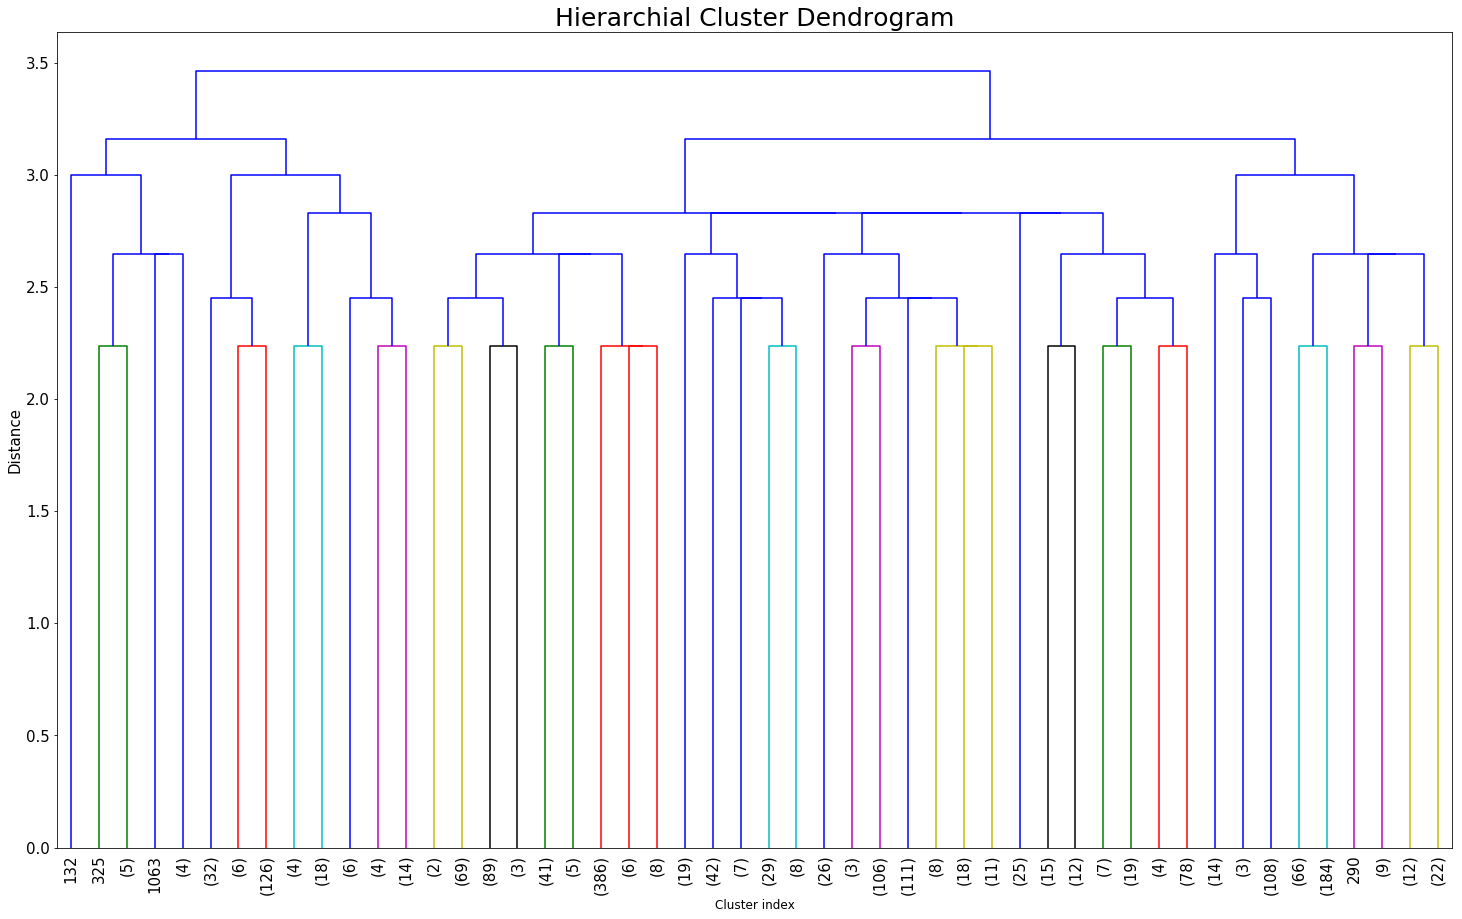

In [64]:
from scipy.cluster.hierarchy import dendrogram

# Initialize figure settings and labels
plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

# Plot dendrogram with following parameters
# p = 75 and trucate_mode = 'lastp' work together to display
# only the final 75 nodes of the dendrogram
dendrogram(completeEuclidZ, 
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 50, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis 
            leaf_font_size=15,
            show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.show()

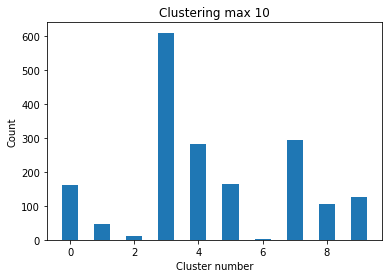

In [65]:
# Import the new clustering funciton
from sklearn.cluster import AgglomerativeClustering

# define the clustering model
hClusMdl = AgglomerativeClustering(n_clusters=10, linkage='complete', affinity = 'euclidean')
hClusMdl.fit(dfBusiness)

# Get cluster lables
clA = hClusMdl.labels_

# Make a histogram of number of points in each cluster (labeled 0 -> 9)
binNums = list(set(clA))
# Add on range to cover last value
binNums.append(np.max(binNums)+1)

#Plot histogram
plt.hist(clA,bins=binNums,rwidth=0.5,align='left')
plt.title('Clustering max 10')
plt.ylabel('Count')
plt.xlabel('Cluster number')

plt.show()

## Part 2 K-means clustering 

In [66]:
from sklearn.cluster import KMeans

# Define model and fit the model, which is similar format to previous regression models
mdlKMeans = KMeans(n_init = 1, # number of different centroid seed initializations (number of times algorithm is run)
                n_clusters=10, # number of clusters (k)
                random_state = 5) # random seed for kmean algorithm

mdlKMeans.fit(dfBusiness)

# Get cluster assignments for each datapoint
clK = mdlKMeans.labels_

# Get the centroid of each cluster
Centroids = mdlKMeans.cluster_centers_

In [67]:
Centroids

array([[-1.38777878e-17,  1.29870130e-02,  1.29870130e-02,
         2.85714286e-01,  1.00000000e+00,  6.93889390e-18,
         4.02597403e-01,  1.73472348e-18,  2.59740260e-02,
         1.81818182e-01,  1.66533454e-16,  2.59740260e-02,
         3.89610390e-02,  1.73472348e-18,  1.04083409e-17,
         1.29870130e-02,  5.55111512e-17,  3.89610390e-02,
         3.46944695e-18,  2.59740260e-02,  5.19480519e-02,
         1.29870130e-02, -3.46944695e-18, -3.12250226e-17,
         1.38777878e-17,  1.29870130e-02,  1.73472348e-18,
        -2.60208521e-17,  1.38777878e-17,  3.89610390e-02],
       [ 2.71739130e-02,  5.43478261e-03,  4.61956522e-02,
         8.42391304e-02,  2.91433544e-16,  1.08695652e-02,
         4.02455846e-16,  1.30104261e-17,  1.35869565e-02,
         5.70652174e-02,  1.16573418e-15, -5.13478149e-16,
         5.59782609e-01,  1.08695652e-02,  1.90217391e-02,
         1.12757026e-17,  9.78260870e-02,  5.41233725e-16,
         1.12757026e-17,  8.15217391e-03, -1.38777878e-

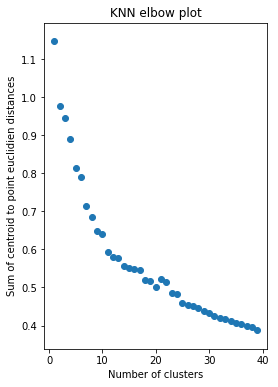

In [69]:
# Choose range for cluster sizes to plot
clusterSizes = list(range(1,40))
avgDistances = []

for k in clusterSizes:
    # make and fit a model with k clusters
    # -------------------
    mdlKMeans.n_clusters = k 
    mdlKMeans.fit(dfBusiness)

    
    # -------------------
    
    # Get distances for each point that is fit to the model
    distsForK = mdlKMeans.transform(dfBusiness)
    
    # Get y values (sum of euclidien distance) for the plot
    # -------------------
    point2ClusterDistance = np.min(distsForK,axis = 1)
    avgDistances.extend([(point2ClusterDistance).mean()])
 
    # -------------------

plt.figure(figsize=(4,6))
plt.scatter(clusterSizes,avgDistances)
plt.ylabel('Sum of centroid to point euclidien distances')
plt.xlabel('Number of clusters')
plt.title('KNN elbow plot')
#plt.scatter(clusterSizes[17] , avgDistances[17], color = 'red')
#plt.savefig('img/elbowPlot.png')
plt.show()

## Part 3: Predicting Rating Using Clusters

In [70]:
df_final.head()


,Review_ID,u_id,business_id,rev_stars,date,name,city,state,bus_stars,ResReview_count,...,Bars,Breakfast & Brunch,Cafes,Desserts,North America,Bakeries,Bars,Cafes,Latin American,newbus_id
0,0,0LUt7xSvYgLpL0zBezI5QA,nvbfWYxTNq5XgJkcAPcXNQ,5.0,2015-10-24 14:04:14,Thai One On,North York,ON,2.5,38,...,0,0,0,0,0,0,0,0,0,0
1,1,0LUt7xSvYgLpL0zBezI5QA,snw9iNNLpFYZeHotW00uVA,5.0,2015-10-24 12:29:24,Lee Restaurant,Toronto,ON,4.0,561,...,0,0,0,0,0,0,0,0,0,1
2,2,31nz8urmYS2uogLPWZnx7Q,41o1FUbCYKJv2djtnlkzlg,4.0,2016-10-28 00:40:36,Bar Raval,Toronto,ON,4.0,225,...,0,0,0,0,0,0,0,0,0,2
3,3,47NAV-86kgFEuIWT3Y9o-A,EK38MXW_OsC5CZVvIZodIw,4.0,2016-08-22 01:15:05,Fugo Desserts,Toronto,ON,3.5,232,...,0,0,0,0,0,0,0,0,0,3
4,4,6J0mGxAaPuHAPj8ShjOCag,OIdOJaNS8M624F58XGV3PQ,3.0,2016-04-23 01:18:12,Pizzeria Libretto Danforth,Toronto,ON,4.0,287,...,0,0,0,0,0,0,0,0,0,4


In [71]:
ratedBusinessIds = list(df_final.newbus_id) 
ratedBusiness_feature = ['rev_stars','u_id','business_id']

#dfRatedBusiness = dfRatedBusiness.drop_duplicates(subset='business_id', keep='first', inplace=False)
dfRatedBusiness = df_final[ratedBusiness_feature]
dfRatedBusiness.index = ratedBusinessIds


In [72]:
dfRatedBusiness

,rev_stars,u_id,business_id
0,5.0,0LUt7xSvYgLpL0zBezI5QA,nvbfWYxTNq5XgJkcAPcXNQ
1,5.0,0LUt7xSvYgLpL0zBezI5QA,snw9iNNLpFYZeHotW00uVA
2,4.0,31nz8urmYS2uogLPWZnx7Q,41o1FUbCYKJv2djtnlkzlg
3,4.0,47NAV-86kgFEuIWT3Y9o-A,EK38MXW_OsC5CZVvIZodIw
4,3.0,6J0mGxAaPuHAPj8ShjOCag,OIdOJaNS8M624F58XGV3PQ
5,5.0,6J0mGxAaPuHAPj8ShjOCag,K6MBwTYeuLH0VsTVCLVgxg
6,1.0,6J0mGxAaPuHAPj8ShjOCag,ySG8ryvIOkwNF2hKG6pYkw
7,5.0,6J0mGxAaPuHAPj8ShjOCag,Bww6zo7r7rf_N6YRB3hZRQ
8,1.0,6J0mGxAaPuHAPj8ShjOCag,uMQV2qwiviaCA61tvEjmFQ
9,5.0,9aCT1x8udt67wEIqv_xjTA,nBo99rJ9dG6-hiKdo7E7gw


In [73]:
dfRatedBusiness = dfRatedBusiness.loc[dfRatedBusiness['u_id'] == 'zWWcik1fRPZviBCQLC26FQ']

In [74]:
dfRatedBusiness

,rev_stars,u_id,business_id
176,4.0,zWWcik1fRPZviBCQLC26FQ,88RkIuXwJeDzfzSu9xsyzw
79,5.0,zWWcik1fRPZviBCQLC26FQ,OuetgAKs90ce74ojny3nMw
177,3.0,zWWcik1fRPZviBCQLC26FQ,v95ot_TNwTk1iJ5n56dR0g
77,4.0,zWWcik1fRPZviBCQLC26FQ,8I5U8OQ06nSxX2y4PPOWzQ
178,4.0,zWWcik1fRPZviBCQLC26FQ,qCPyN84ieevYZV9ZbUZXgg
179,1.0,zWWcik1fRPZviBCQLC26FQ,pp7Oy267KiVZkgrp-f6OMQ
159,2.0,zWWcik1fRPZviBCQLC26FQ,04HfzvvANCF3hd-yx6ZACw
180,4.0,zWWcik1fRPZviBCQLC26FQ,uwT7CppiYkek-Z-661sndQ
181,4.0,zWWcik1fRPZviBCQLC26FQ,SxjNgkzAlUG-wt2rSbc2HQ
182,4.0,zWWcik1fRPZviBCQLC26FQ,mOzOYgXYOmkdNfZr453PgQ


In [75]:

dfRatedBusiness = dfRatedBusiness.drop_duplicates(subset='business_id', keep='first', inplace=False)

dfRatedBusiness.columns = dfRatedBusiness.columns.str.replace('rev_stars','rating')
ratedBusiness_feature_2  = ['rating']
dfRatedBusiness = dfRatedBusiness[ratedBusiness_feature_2]


In [76]:
dfRatedBusiness.shape

(60, 1)

### 3.1 Model Evaluation

In [77]:
def model_eval(dfWithYs):
    # This function elvaluates the Rsq of the full model (i.e., model predictions
    # for each cluster put together)    
    # Calculate mdl error as difference
    mdlError = dfWithYs.rating - dfWithYs.ratingPred;
    yHatAvg = dfWithYs.rating.mean()
    
    # Calculate R^2 value
    Rsq = 1 - sum(mdlError**2)/sum((dfWithYs.rating - yHatAvg)**2)
    Rsq = np.round(Rsq,3)
    
    # Print results to console
    print('The R^2 over the data is {}'.format(Rsq))

In [78]:
# Define a cluster model
mdlHClus = AgglomerativeClustering(n_clusters=10, linkage='complete', affinity = 'euclidean')
mdlClus = KMeans(n_init = 100, n_clusters=10)
# Define a regression model 
from sklearn.linear_model import LinearRegression
mdlLinReg = LinearRegression()


In [79]:
dfRatedBusiness.shape

(60, 1)

In [80]:
def cluster_regression_model(dfRatedBusiness,dfBusiness,mdlClus,mdlReg,Q=0):
    # Randomly generate training and testing set
   
    
    np.random.seed(1)
    trainMask = np.random.rand(len(dfRatedBusiness)) < 0.8
    dfTrain = dfRatedBusiness[trainMask]
    dfTest = dfRatedBusiness[~trainMask]

    # Fit cluster model to training data (1 line)
    # -------------------
   
    mdlClus.fit(dfBusiness.loc[dfTrain.index])

    # -------------------
    
 # Assign cluster lables to training and testing
    dfTrain = dfTrain.assign(cluster = mdlClus.labels_)
    dfTest = dfTest.assign(cluster = mdlClus.fit_predict(dfBusiness.loc[dfTest.index]))

    # Initialize prediction vector as a new column in dfTrain and dfTest
    dfTrain = dfTrain.assign(ratingPred = np.nan)
    dfTest = dfTest.assign(ratingPred = np.nan)

    # Number of clusters 
    clusters = range(mdlClus.n_clusters)
    # Go through each cluster to make a model
    for c in clusters:
        # Get all indices that belong to cluster c
        trainClusterInds = dfTrain.index[dfTrain.cluster==c]
        testClusterInds = dfTest.index[dfTest.cluster==c]

        # Get associated training and testing data
        yTrain = dfTrain.rating.loc[trainClusterInds]
        xTrain = dfBusiness.loc[trainClusterInds]
        yTest = dfTest.rating.loc[testClusterInds]
        xTest = dfBusiness.loc[testClusterInds]
        
        # Fit regression model to training data (1 line)
        # -------------------

        mdlReg.fit(xTrain, yTrain)
        
        # -------------------

        # Save model predictions to appropriate dfs
        dfTrain.at[trainClusterInds,'ratingPred'] = list(mdlReg.predict(xTrain))
        dfTest.at[testClusterInds,'ratingPred'] = list(mdlReg.predict(xTest))

        # Modify this block to answer question 14
        if Q == 14:
        # -------------------
          
            mdlTrainingPoints = len(yTrain)
            RSquared = np.round(mdlReg.score(xTest,yTest),3)
        # -------------------
            print('Cluster {} trained on {} points and the testing set had an R^2 of {}'.format(c,mdlTrainingPoints,RSquared))


    print('\nTraining set')
    model_eval(dfTrain)
    print('\nTesting set')
    model_eval(dfTest)

# Test function with a lasso model and clusters made in previous step
cluster_regression_model(dfRatedBusiness,dfBusiness,mdlHClus,mdlLinReg)

  


Training set
The R^2 over the data is 0.31

Testing set
The R^2 over the data is 0.115


In [81]:
# Refer to the print statement in the cluster_model (above)
cluster_regression_model(dfRatedBusiness,dfBusiness,mdlHClus,mdlLinReg,Q=14)
#A: R^2 varies a lot, and some clusters have very few points, which mean

Cluster 0 trained on 4 points and the testing set had an R^2 of 1.0
Cluster 1 trained on 25 points and the testing set had an R^2 of 0.0
Cluster 2 trained on 5 points and the testing set had an R^2 of 0.0
Cluster 3 trained on 8 points and the testing set had an R^2 of 0.0
Cluster 4 trained on 3 points and the testing set had an R^2 of 0.0
Cluster 5 trained on 1 points and the testing set had an R^2 of 0.0
Cluster 6 trained on 1 points and the testing set had an R^2 of 0.0
Cluster 7 trained on 1 points and the testing set had an R^2 of 0.0
Cluster 8 trained on 1 points and the testing set had an R^2 of 0.0
Cluster 9 trained on 1 points and the testing set had an R^2 of 0.0

Training set
The R^2 over the data is 0.31

Testing set
The R^2 over the data is 0.115


#### Compare hierarchical clustering model with k-means 

In [82]:
# Define the cluster model
mdlH5Clus= AgglomerativeClustering(n_clusters=5, linkage='complete', affinity = 'euclidean')
mdlKMeans5Clus = KMeans(n_init = 100, n_clusters=5)

# Define a regression model 
cluster_regression_model(dfRatedBusiness,dfBusiness,mdlH5Clus,mdlLinReg)
cluster_regression_model(dfRatedBusiness,dfBusiness,mdlKMeans5Clus,mdlLinReg)



Training set
The R^2 over the data is 0.31

Testing set
The R^2 over the data is -0.204

Training set
The R^2 over the data is 0.31

Testing set
The R^2 over the data is -0.726
